In [22]:
#Import and settings
import os
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

datadir = 'train'
columns = ['Name','Epoch','TrainEpochLoss','TrainEpochDuration','ValidEpochLoss','ValidEpochDuration','BLEU-1','BLEU-2','BLEU-3','BLEU-4']


In [43]:
#Get subfolders
#training = os.listdir(datadir)
training = ['M1','M2','M3','M4']
training.sort()


TrainDf = pd.DataFrame(columns=columns)

for folder in training:
    fname = os.path.join(datadir, folder, 'stats.csv')
    if os.path.isfile(fname): 
        df = pd.read_csv(fname, header=None,  index_col=False)

        if len(df.columns) == 4:
            df.rename({0: 'TrainEpochLoss', 1: 'TrainEpochDuration', 2: 'ValidEpochLoss', 3: 'ValidEpochDuration'}, inplace=True, axis='columns')
        elif len(df.columns) == 5:
            df.rename({0: 'TrainEpochLoss', 1: 'TrainEpochDuration', 2: 'ValidEpochLoss', 3: 'ValidEpochDuration', 4: 'BLEU-4'}, inplace=True, axis='columns')    
        elif len(df.columns) == 8:
            df.rename({0: 'TrainEpochLoss', 1: 'TrainEpochDuration', 2: 'ValidEpochLoss', 3: 'ValidEpochDuration', 4: 'BLEU-1', 5: 'BLEU-2', 6: 'BLEU-3', 7: 'BLEU-4'}, inplace=True, axis='columns')    
        df['Epoch'] = np.arange(len(df)) +1
        df['Name'] = folder
        TrainDf = pd.concat([TrainDf, df], sort=True)
TrainDf.reset_index(drop=True, inplace=True)
TrainDf['TrainEpochDuration'] /= 60    
TrainDf['ValidEpochDuration'] /= 60 
TrainDf.sort_values(by=['Name','Epoch'], inplace=True)
    

In [44]:
TrainDf.loc[TrainDf['Name']=='M3']

,BLEU-1,BLEU-2,BLEU-3,BLEU-4,Epoch,Name,TrainEpochDuration,TrainEpochLoss,ValidEpochDuration,ValidEpochLoss
10,0.637083,0.486560,0.387020,0.315618,1,M3,129.057570,2.866611,63.435459,6.178011
11,0.637381,0.491416,0.394208,0.324256,2,M3,110.408783,2.166778,47.746677,6.499434
12,0.627310,0.487323,0.393388,0.325565,3,M3,98.836620,2.015348,48.050535,6.618064
13,0.633216,0.491482,0.397200,0.329187,4,M3,98.474246,1.910924,47.962552,6.737865
14,0.639366,0.496785,0.401361,0.332512,5,M3,98.721520,1.851871,48.123608,6.863522


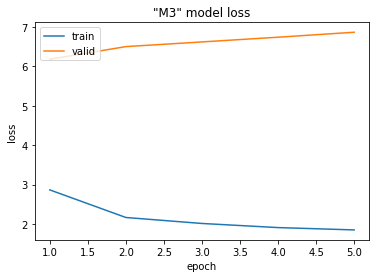

In [45]:
model = 'M3'

p = TrainDf.loc[TrainDf['Name'] == model]
p = p.set_index('Epoch')

plt.plot(p['TrainEpochLoss'])
plt.plot(p['ValidEpochLoss'])
plt.title('"' + model + '" model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'valid'], loc='upper left')
plt.show()

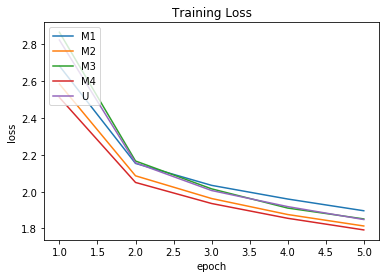

In [46]:
for folder in training:
    p = TrainDf.loc[TrainDf['Name'] == folder]
    p = p.set_index('Epoch')
    plt.plot(p['TrainEpochLoss'])

plt.title('Training Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(training, loc='upper left')
plt.show()

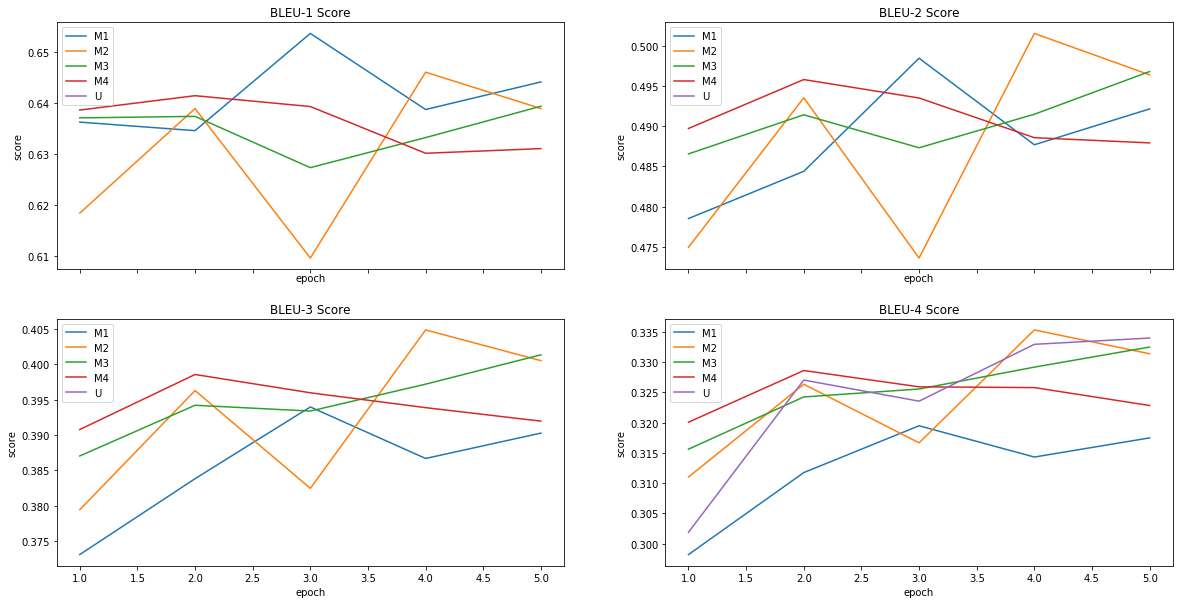

In [47]:
def plot_score(score, ax):
    for folder in training:
        p = TrainDf.loc[TrainDf['Name'] == folder]
        p = p.set_index('Epoch')
        ax.plot(p[score])

    ax.set_title('{} Score'.format(score))
    ax.set_ylabel('score')
    ax.set_xlabel('epoch')
    ax.legend(training, loc='upper left')
    

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex='col', figsize=(20, 10))    
plot_score('BLEU-1', ax1)
plot_score('BLEU-2', ax2)
plot_score('BLEU-3', ax3)
plot_score('BLEU-4', ax4)
    
plt.show()